# Basic Train/Test Experiment on the ExtraSensory data set

## Set up the Notebook

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.insert(0, os.path.abspath('..'))
os.chdir(os.path.abspath('..'))

## Import modules

In [3]:
from Blocks.data_loader import extrasensory_data_loader
from Blocks.filter import MisingLabelFilter,  MisingDataColumnFilter, Take
from Blocks.imputer import Imputer
from Blocks.normalizer import Normalizer
from Blocks.experimental_protocol import ExpTrainTest, ExpCV, ExpWithin
from Blocks.results_analysis import ResultsConcat, ResultsCVSummarize, DataYieldReport

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyClassifier

import matplotlib.pyplot as plt

from Workflow.workflow import workflow
import Workflow.compute_graph
import time
import pandas as pd


## Define the workflow

This workflow performs a basic train/test experiment on the ExtraSensory data set sleeping prediction task. The model used is logistic regression with a fixed regularization hyper-parameter. 

The workflow includes a column filter that screens out feature dimensions that are less than 20% observed, and a missing label filter that removes instances without labels. Next, the workflow performs mean imputation followed by feature normalization. Lastly, the train/test experiment is run on the pre-processed data set and results are evaluated using four metrics (accuracy, F1, precision and recall). 

The workflow computation graph is then created and displayed, and the results are displayed. 

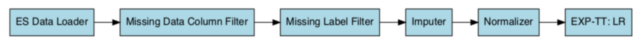

In [4]:
estimators = {"LR": LogisticRegression(solver="lbfgs",max_iter=100)}

metrics   = [accuracy_score, f1_score, precision_score, recall_score]
df_raw    = extrasensory_data_loader(label="SLEEPING");
df_cf     = MisingDataColumnFilter(df_raw, thresh=0.2);
df_lf     = MisingLabelFilter(df_cf);
df_imp    = Imputer(df_lf, method="mean")
df_norm   = Normalizer(df_imp);
results   = ExpTrainTest(df_norm, estimators, metrics=metrics);

flow = workflow(results);
output = flow.run(backend="sequential", monitor=True);


In [5]:
display(output["EXP-TT: LR"]["report"])

,accuracy_score,f1_score,precision_score,recall_score
LR,0.862631,0.718473,0.833741,0.631206
